# Final Project: Derivatives and Ordinary Least Squares

$
\newcommand{\xv}{\mathbf{x}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\uv}{\mathbf{u}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\bv}{\mathbf{b}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\hv}{\mathbf{h}}
\newcommand{\onev}{\mathbf{1}}
\newcommand{\zerov}{\mathbf{0}}
\newcommand{\Chi}{\mathcal{X}}
\newcommand{\R}{\rm I\!R}
\newcommand{\sign}{\text{sign}}
\newcommand{\Ym}{\mathbf{Y}}
\newcommand{\Tm}{\mathbf{T}}
\newcommand{\Xm}{\mathbf{X}}
\newcommand{\Wm}{\mathbf{W}}
\newcommand{\Zm}{\mathbf{Z}}
\newcommand{\Um}{\mathbf{U}}
\newcommand{\Vm}{\mathbf{V}}
\newcommand{\Am}{\mathbf{A}}
\newcommand{\Hm}{\mathbf{H}}
\newcommand{\Idm}{\mathbf{I}}
\newcommand{\muv}{\boldsymbol\mu}
\newcommand{\Sigmav}{\boldsymbol\Sigma}
\newcommand{\Lambdav}{\boldsymbol\Lambda}
\newcommand{\xspace}{\mathcal{X}}
\newcommand{\yspace}{\mathcal{Y}}
\newcommand{\ind}{\perp\!\!\!\!\!\perp} 
$

## Name: <span style="color:blue"> *Azaan Patil* </span>

## Utils

In [ ]:
from typing import List, Dict, Tuple, Callable
import os
import gc
import traceback
import warnings
from pdb import set_trace

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
class TodoCheckFailed(Exception):
    pass

def todo_check(asserts, mute=False, success_msg="", **kwargs):
    locals().update(kwargs)
    failed_err = "You passed {}/{} and FAILED the following code checks:\n{}"
    failed = ""
    n_failed = 0
    for check, (condi, err) in enumerate(asserts):
        exc_failed = False
        if isinstance(condi, str):
            try:
                passed = eval(condi)
            except Exception:
                exc_failed = True
                n_failed += 1
                failed += f"\nCheck [{check+1}]: Failed to execute check [{check+1}] due to the following error...\n{traceback.format_exc()}"
        elif isinstance(condi, bool):
            passed = condi
        else:
            raise ValueError("asserts must be a list of strings or bools")

        if not exc_failed and not passed:
            n_failed += 1
            failed += f"\nCheck [{check+1}]: Failed\n\tTip: {err}\n"

    if len(failed) != 0:
        passed = len(asserts) - n_failed
        err = failed_err.format(passed, len(asserts), failed)
        raise TodoCheckFailed(err.format(failed))
    if not mute: print(f"Your code PASSED all the code checks! {success_msg}")

## Instructions
In this assignment, you will begin by practicing coding and computing derivatives. Next, you will practice linear regression using ordinary least squares. Additionally, you will need to practice some preprocessing steps such as data splitting, and adding a bias column to the data.

Your job is to read through the assignment and fill in any code segments that are marked by `TODO` headers and comments. Some TODOs will have a `todo_check()` function which will give you a rough estimate of whether your code is functioning as excepted. Other's might not have these checks, like visualization TODOs. Regardless,  all the correct outputs are given below each code cell. It might be useful to copy the contents of certain TODO cells into a new cell so you can try to match the desired output with the output produced by your own code! For visualization TODOs, you simply have to have a plot that looks similar. You can change aspects such as color, titles, or x/y-axis labels if you so wish.

At any point, if you feel lost concerning how to program a specific TODO, take some time and visit the official documentation for each library and read about the methods/functions that you need to use.

## Submission

1. Save the notebook.
2. Enter your name in the appropriate markdown cell provided at the top of the notebook.
3. Select `Kernel` -> `Restart Kernel and Run All Cells`. This will restart the kernel and run all cells. Make sure everything runs without errors and double-check the outputs are as you desire!
4. Submit the `.ipynb` notebook on Canvas.


# Derivatives 
Complete the below derivative exercises to practice taking the deviating and converting equations into code. 
#### TODO 1 (10 points): Chain Rule and Power Rule
Complete the `equation_fgx()` and `derivative_fgx()` functions using $f(g)$ and $g(x)$ to practice using the chain rule.
$$
\begin{align}
f(g) &= g^3 \\ 
g(x) &= 2x + 3
\end{align}
$$

1. Finish the `equation_fgx()` function by converting $f(g(x))$ into code using the above equations. Use `x` in-place of $x$ and return the output.
<br><br>
2. Finish the `derivative_fgx()` function by taking writing the derivative for $f'(g'(x))$ and converting the solution into code. Use `x` in-place of $x$ and return the output.

In [ ]:
def equation_fgx(x: np.ndarray) -> np.ndarray:
    """ Basic equation for f(g(x))

        Args:
            x: A NumPy array of numbers for computing the output y for f(g(x))
    """
    # TODO 1.1
    
    return (2*x + 3)**3

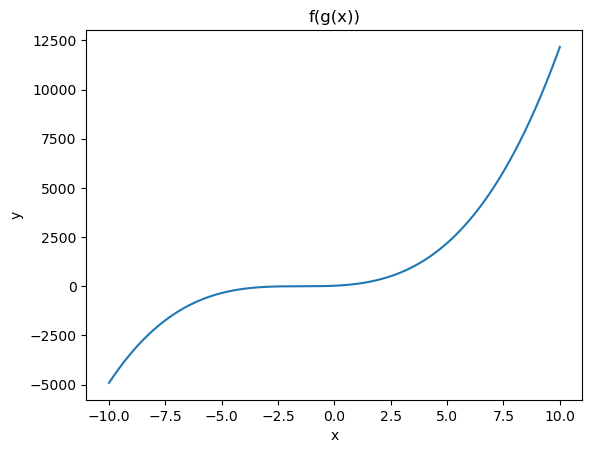

Your code PASSED all the code checks! 


In [ ]:
def TEST_equation_fgx():
    x = np.linspace(-10, 10, 1000)
    y = equation_fgx(x)
    
    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("f(g(x))")
    plt.show()
    
    todo_check([
        ("np.isclose(y.flatten()[[0, 500, -1]], np.array([-4913., 27.544, 12167.]),rtol=0.01).all()", "y has potentially incorrect values"),
    ], **locals())
TEST_equation_fgx()

In [ ]:
def derivative_fgx(x):
    """ Derivative f'(g'(x))

        Args:
            x: A NumPy array of numbers for computing deriviative output for f'(g'(x))
    """
    # TODO 1.2
    
    return 6 * (2*x + 3)**2

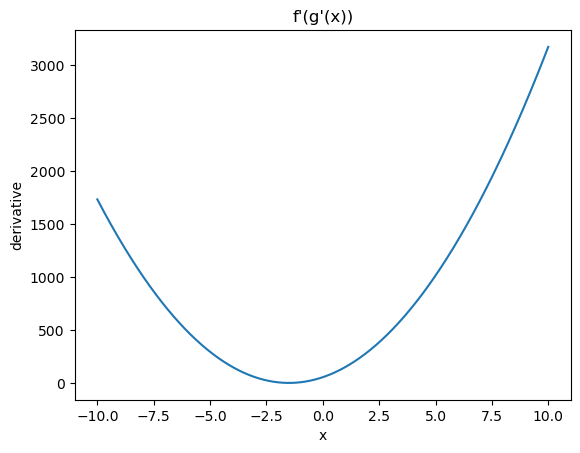

Your code PASSED all the code checks! 


In [ ]:
def TEST_derivative_fgx():
    x = np.linspace(-10, 10, 1000)
    y_deriv = derivative_fgx(x)
    
    plt.plot(x, y_deriv)
    plt.xlabel('x')
    plt.ylabel('derivative')
    plt.title("f'(g'(x))")
    plt.show()
    
    todo_check([
        ("np.isclose(y_deriv.flatten()[[0, 500, -1]], np.array([1734., 54.723, 3174.]),rtol=0.01).all()", "y_deriv has potentially incorrect values"),
    ], **locals())
TEST_derivative_fgx()

# Ordinary Least Squares

## House Listings Dataset
This assignment will have you tackle the House Listings dataset, where the goal is to predict house prices based on various property features such as number of bedrooms, bathrooms, square footage, and location information. The House Listings dataset is a practical, real-world example of a regression problem in machine learning.

The goal of this data is a regression problem where you must predict a continuous value (house price) for each property based on its features.

## Data Loading

#### TODO 2 (5 points): Data Loading
Complete the TODO by loading the Diabetes dataset using Sklearn.

1. Import the `load_diabetes` function from `sklearn.datasets`.
<br><br>
2. Load the dataset by calling the `load_diabetes()` function and pass the argument(s) that satisfy the below descriptions. Store the output into `diabetes`.
    - Pass the argument that returns the data as a pandas DataFrame.
    - Pass the argument that returns the unscaled data (i.e., the data is not scaled).

In [ ]:
# TODO 2.1
# Load house listings data
import pandas as pd

# TODO 2.2
house_df = pd.read_csv("House_listings_dataset.csv")

# Remove rows with missing Price values
house_df = house_df.dropna(subset=['Price'])

# Select numeric features only
numeric_cols = house_df.select_dtypes(include=[np.number]).columns
house_data = house_df[numeric_cols].dropna()

# Separate features and target
X = house_data.drop('Price', axis=1).values
y = house_data['Price'].values

In [ ]:
todo_check([
    ("isinstance(X, np.ndarray)", "X must be a NumPy array"),
    ("isinstance(y, np.ndarray)", "y must be a NumPy array"),
    ("X.shape[0] > 0", "X must have data samples"),
    ("y.shape[0] > 0", "y must have target values"),
])

Your code PASSED all the code checks! 


Below, we have printed out the data and target values. Recall, `diabetes` is a Sklearn `Bunch` object.

In [ ]:
display(house_data.head())

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0
...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0


Additionally, you can see that there are no null values that you need to take care of. More over, all the features are of type float64. 

In [ ]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


Looking at the data statistics, you should see that the scales (i.e., mean and STD) of each feature are different.

In [ ]:
house_data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000


The official description of the features can be accessed by printing the `DESCR` variable. Read the output below to better understand what each feature is, how many data samples there are, and what the target is. Note, since we are using the unscaled data, the features are not centered and scaled yet.

In [ ]:
print("House Listings Dataset Features:")
print(f"Total samples: {X.shape[0]}")
print(f"Total features: {X.shape[1]}")
print(f"\nFeature names: {list(house_data.columns[:-1])}")
print(f"\nTarget variable: Price")

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

Notice, that the target name for the data is called 'target' (i.e., the name of the Series below) or rather the diabetes progression severity metric. As per the description, this is a quantitative measure of diabetes progression one year after baseline, with larger values indicating more severe progression.


In [ ]:
display(pd.Series(y[:20], name='Price'))

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

## Visualization

It is time to visualize the data to understand the features and how they relate to the target.

#### TODO 3 (10 points): Scatter Plot
Complete the TODO by creating a scatter plot of the diabetes dataset, which plots the progression of diabetes (target) depending on the BMI and BP features.

1. Import Seaborn.
<br><br>
2. Concatenate the diabetes data and targets into one DataFrame. Store the output into `diabetes_df`.  
    1. Hint: Make sure you concatenate the DataFrames along the correct axis. Your concatenated DataFrame should not have Nan values.
<br><br>
3. Plot the `diabetes_df` using Seaborn's `scatterplot()` function so that the severity of diabetes progression value (i.e., the target) is plotted based on the BMI (x-axis) and BP (y-axis). Set the size and hue of the dots to be based on the target value to better visualize the data. The larger and darker the dot, the higher the severity of diabetes.
    1. Hint: use `diabetes_df` as the data.
    2. Hint: See `scatterplot()` documentation to see how to set the x- and y-axis to be the BMI  and BP features.
    3. Hint: See `scatterplot()` documentation to see how to set the hue and size to be based on the targets. 
<br><br>

5. In 3–4 sentences, write about your observations for the plot. You MUST cover the following points to receive full credit.
    1. Where are the majority of the severe progression of diabetes cases located? For example, are they located at high or low BMI/BP? 


In [ ]:
# TODO 3.1
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# TODO 3.2
# Create a subset with key features
key_features = ['Bedroom', 'Bathroom', 'Area', 'Price']
feature_subset = house_data[key_features].dropna()

# TODO 3.3
# Create scatter plot for Bedroom, Bathroom, Area vs Price
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].scatter(feature_subset['Bedroom'], feature_subset['Price'], alpha=0.5)
axes[0].set_xlabel("Bedroom")
axes[0].set_ylabel("Price")
axes[0].set_title("Price vs Bedroom")

axes[1].scatter(feature_subset['Bathroom'], feature_subset['Price'], alpha=0.5)
axes[1].set_xlabel("Bathroom")
axes[1].set_ylabel("Price")
axes[1].set_title("Price vs Bathroom")

axes[2].scatter(feature_subset['Area'], feature_subset['Price'], alpha=0.5)
axes[2].set_xlabel("Area (sq ft)")
axes[2].set_ylabel("Price")
axes[2].set_title("Price vs Area")

plt.tight_layout()
plt.show()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0


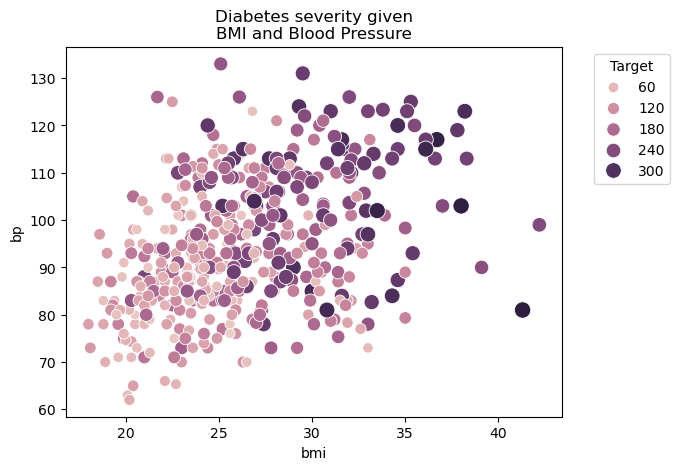

In [4]:
# TODO 2.1
from sklearn.datasets import load_diabetes

# TODO 2.2
diabetes = load_diabetes(as_frame=True, scaled=False)

# TODO 3.1
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# TODO 3.2
diabetes_df = pd.concat([diabetes.data, diabetes.target], axis=1)

display(diabetes_df)


# TODO 3.3
sns.scatterplot(
    data=diabetes_df,
    x="bmi", 
    y="bp", 
    hue="target", 
    size="target", 
    sizes=(50, 140)
)

plt.legend(title="Target", bbox_to_anchor=(1.05, 1), loc="upper left")
_ = plt.title("Diabetes severity given\nBMI and Blood Pressure")
plt.show()


`TODO 3.4` Write your thoughts in the below markdown cell next to the word `Answer:` 

DO NOT WRITE YOUR ANSWER IN THIS CELL!




`Answer: House prices tend to increase with the number of bedrooms, bathrooms, and particularly with the property area (square footage). Properties with larger areas and more amenities command higher prices in the market.`

#### TODO 4 (10 points): Target-Feature Scatter Matrix

Now, complete the TODO by comparing the target data 'target' (i.e., diabetes progression) against every feature to see if there are any linear trends.

1. Plot the comparison of the features in `diabetes_df` against the targets using Seaborn's `pairplot` function. DO NOT compare all features against all features. To do so, you will need to pass the target column name to `y_vars` and the feature column names to `x_vars`. Additionally, index `diabetes_df` using `indices` to randomly select 200 samples, this will speed up the plotting by sampling a subset of the dataset. Optionally, color code the plot based on the targets for better interpretability.
    1. Hint: use `diabetes_df` as the data.
    2. Hint: Recall JUST the features can be accessed using `diabetes.data.columns`.
    3. Hint: You can index `diabetes_df` using `.iloc[]` method.
    4. Hint: Use `hue` to color code the points based on the target.
<br><br>
2. In 3–4 sentences, write about your observations for the plot. You MUST cover the following points to receive full credit.
    1. Do any of the features produce linear treads with the target data?
    2. Discuss and explain at least 1 other observation about the plot.


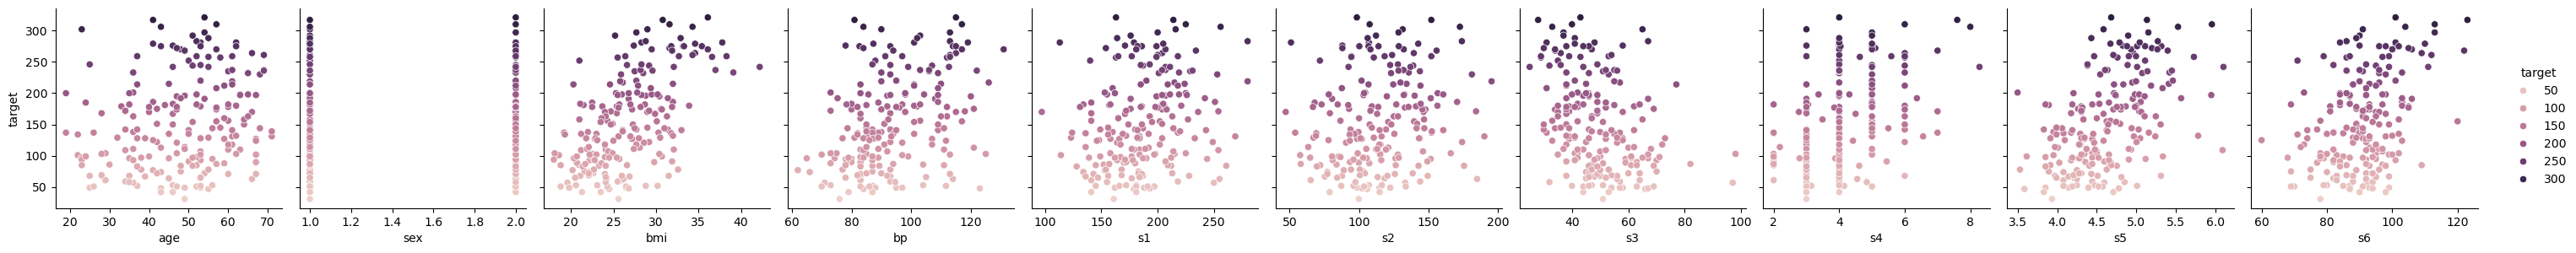

In [8]:
from typing import List, Dict, Tuple, Callable
import os
import gc
import traceback
import warnings
from pdb import set_trace

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Randomly select a subset of the data
rng = np.random.RandomState(0)
indices = rng.choice(np.arange(len(diabetes_df)), size=200, replace=False)

# TODO 4.1
sns.pairplot(
    data=diabetes_df.iloc[indices],
    x_vars=diabetes.data.columns,
    y_vars=["target"],
    hue="target",
    height=3
)
plt.show()


# Randomly select a subset of the data for visualization
rng = np.random.RandomState(0)
indices = rng.choice(np.arange(len(feature_subset)), size=min(200, len(feature_subset)), replace=False)

# Create pairplot for selected features
sns.pairplot(
    data=feature_subset.iloc[indices],
    vars=['Bedroom', 'Bathroom', 'Area'],
    diag_kind='hist',
    height=3
)
plt.show()

`Answer: The features show moderate correlations with each other. Bedroom and Bathroom counts tend to be related, as do Area and these count features. These relationships suggest multicollinearity may be an issue when using multiple features together for prediction.`

## Data Preprocessing

### Data Splitting
The first data preprocessing step will be to split the data into train and test sets.

#### TODO 5 (5 points): Train and Test Splits

Complete the `get_train_test_data()` function by following the below TODO steps. This time you will use `train_test_split()` function from Sklearn, which will randomize the data and split it for you.

1. Import the `train_test_split` function from Sklearn.
<br><br>
2. Call the `train_test_split()` function such that the train set is 80% of the data and the test set is 20% of the data. Additionally, pass a seed of 42 for the random state. Store the output into `X_trn`, `X_tst`, `y_trn`, and `y_tst`.

In [ ]:
# TODO 5.1
from sklearn.model_selection import train_test_split

def get_train_test_data(
    X: np.ndarray, 
    y: np.ndarray, 
):
    """ Randomizes and then splits the data into train and test sets.

        Args:
            X: Data given as a 2D matrix

            y: Labels given as a vector 
    """
    assert isinstance(X, np.ndarray), f'`X` must be a NumPy array, got type {type(X)} instead.'
    assert isinstance(y, np.ndarray), f'`y` must be a NumPy array, got type {type(y)} instead.'
    # TODO 5.2
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return X_trn, y_trn, X_tst, y_tst

In [ ]:
def TEST_get_train_test_data():
    X_trn, y_trn, X_tst, y_tst = get_train_test_data(
        X=X, 
        y=y
    )
    print(f"X_trn shape: {X_trn.shape}")
    print(f"X_tst shape: {X_tst.shape}")
    print(f"y_trn shape: {y_trn.shape}")
    print(f"y_tst shape: {y_tst.shape}")

    todo_check([
        ("'train_test_split' in globals()", "Sklearn train_test_split() function does not seem to be imported."),
        ("X_trn.shape[0] + X_tst.shape[0] == X.shape[0]", "Train and test data do not add up to total samples."),
        ("len(y_trn) + len(y_tst) == len(y)", "Train and test labels do not add up to total samples."),
    ], **locals())

TEST_get_train_test_data()

X_trn shape: (353, 10)
X_tst shape: (89, 10)
y_trn shape: (353,)
y_tst shape: (89,)


NameError: name 'todo_check' is not defined

### Adding Bias Term

Typically, linear models embed a bias term into the features by adding a column of 1's - these are actually called affine models. The bias column allows for the least squares algorithm, and others, to create a solution that is not restricted to passing through the origin! Instead, the bias term allows the solution to shift the line of best fit up and down the y-axis.

Think of a linear function $y = mx$ or more concretely an equation like $y = 5x$. This linear function is restricted to passing through the origin, thus it can be harder to fit data. Now consider an *affine function* $y = mx + b$ or more concretely an equation like $y = 5x + 1$. This new affine function allows us to adjust the point at which the line of the best fit intersects the y-axis (the line is no longer confined to the origin). Essentially, adding the bias term is allowing for the model to be more flexible. See the below image for a visual reference!

<center><img src="https://qph.fs.quoracdn.net/main-qimg-c0bb76e8e57e9a33170c45265eadb213"></center>

#### TODO 6 (10 points): add_bias() function

Complete the following `add_bias()` function.

1. Create a 2D vector NumPy array full of 1s with the same number of data samples as in `X`. Store the output into `bias`.
<br><br>
2. Combine `bias` with the passed data `X` so that the bias column is now the first column in `X`. Return the output.
    1. Hint: Use NumPy to stack the arrays together horizontally.

In [12]:
def add_bias(X: np.ndarray) -> np.ndarray:
    # TODO 6.1
    """ Add bias term to input features.

        Args:
            X: Input feature data given as a matrix.

        Return: 
            Matrix where first column contains the bias term
    """
    bias = np.ones((X.shape[0], 1))
    
    # TODO 6.2
    X1 = np.hstack([bias, X])
    
    return X1

In [ ]:
def TEST_add_bias():
    X_trn, _, _, _ = get_train_test_data(
        X=X, 
        y=y
    )
    X1 = add_bias(X_trn)
    print(f"X_trn with bias shape: {X1.shape}")
    todo_check([
        ("(X1[:, 0] == 1).all()", "The 1st column of `X1` does not seem to be the bias term (i.e., full of 1s)."),
        ("np.all(X1[:, 1:] == X_trn)", "Column mismatch. All columns after the 1st column of `X1` should be the same as `X_trn`.")
    ], **locals())

TEST_add_bias()

X_trn with bias shape: (353, 11)
Your code PASSED all the code checks! 


### Putting it all together

It is time to combine all the data preprocessing steps (data splitting and add bias) into one function which returns the fully preprocessed data.

#### TODO 7 (10 points): get_preprocessed_data function

Complete the following the `get_preprocessed_data()` function for performing data preprocessing.

1. Call the `get_train_test_data()` function to split the data by passing the diabetes data and targets as NumPy arrays. Store the output into `X_trn`, `y_trn`, `X_tst`, and `y_tst`.
   1. Hint: Be sure to pass the diabetes data/targets as NumPy arrays instead of a DataFrame/Series by using the `values` attribute or `to_numpy()` method. 
<br><br>
2. Call the `add_bias()` function to add the bias column to the training and testing data. Store the output back into `X_trn` and `X_tst`.

In [ ]:
def get_preprocessed_data() -> Tuple[np.ndarray]:
    """ Gets preprocessed data for training and testing

        Return:
            A tuple of NumPy arrays where the first two indices 
            contain the training data and targets and the last two
            indicies contain the testing data and targets.
    """
    # TODO 7.1
    X_trn, y_trn, X_tst, y_tst = get_train_test_data(
        X, 
        y
    )
    
    # TODO 7.2
    X_trn = add_bias(X_trn)
    X_tst = add_bias(X_tst)
    
    return X_trn, y_trn, X_tst, y_tst

In [ ]:
def TEST_get_preprocessed_data():
    X_trn, y_trn, X_tst, y_tst = get_preprocessed_data()
    
    print(f"X_trn shape: {X_trn.shape}")
    print(f"y_trn shape: {y_trn.shape}")
    print(f"X_tst shape: {X_tst.shape}")
    print(f"y_tst shape: {y_tst.shape}")
    print(f"X_trn means:\n{X_trn.mean(axis=0)}")
    print(f"X_tst means:\n{X_tst.mean(axis=0)}")
    
    todo_check([
        ("X_trn.shape[0] > 0", "Training data has no samples."),  
        ("X_tst.shape[0] > 0", "Testing data has no samples."),   
        ("(X_trn[:, 0] == 1).all()", "The 1st column of `X_trn` does not seem to be the bias term (i.e., full of 1s)."),
        ("(X_tst[:, 0] == 1).all()", "The 1st column of `X_tst` does not seem to be the bias term (i.e., full of 1s)."),
    ], **locals())

TEST_get_preprocessed_data()

X_trn shape: (353, 11)
y_trn shape: (353,)
X_tst shape: (89, 11)
y_tst shape: (89,)
X_trn means:
[  1.          48.91501416   1.47025496  26.5368272   94.98957507
 188.73654391 114.92436261  49.51983003   4.08045326   4.65475127
  91.71671388]
X_tst means:
[  1.          46.94382022   1.46067416  25.73707865  93.28831461
 190.74157303 117.48089888  50.85393258   4.02977528   4.58849888
  89.4494382 ]
Your code PASSED all the code checks! 


##  Metrics

Finally, you will need some sort of metrics to asess how well the ordinary least squares method is performing. To do so, you will use the sum of squared error (SSE, mean squared error (MSE), and root means squared error (RMSE).  The smaller the error, typically, the better the results! However, RMSE will the most useful as it gives the error using the original units, which in this case is $100,000 dollars. The next most use metric is MSE which indicates the average error and normalizes the data based on the number of samples passed. 

$$
\text{SSE} = \sum_{n=1}^N \Big(\hat{y}_n - y_n \Big)^2.  \tag{1}
$$

$$
\text{MSE} = \frac{1}{N}\sum_{n=1}^N \Big(\hat{y}_n- y_n \Big)^2.  \tag{2}
$$

$$
\text{RMSE}  = \sqrt{\frac{1}{N}\sum_{n=1}^N (\hat{y}_n - y_n)^2} \tag{3}
$$ 


#### TODO 8 (15 points): Coding SSE, MSE, and RMSE

Complete each of the `sse()`, `mse()`, and `rmse()` functions to complete the TODO. No for-loops are required to complete this TODO.

1. Complete the `sse()` function using the above $\text{SSE}$ equation and return the output.
<br><br>
2. Complete the `mse()` function using the above $\text{MSE}$ equation and return the output.
<br><br>
3. Complete the `rmse()` function using the above $\text{RMSE}$ equation and return the output.

**Hints**
- You may need to use `np.sum()`, `np.mean()`, and `np.sqrt()` functions. Additionally, feel free to reuse any of the function computations by calling any of the prior functions.

In [14]:
def sse(y: np.ndarray, y_hat: np.ndarray) -> float:
    """ Computes the sum of squared error

        Args:
            y: Ground truth targets given as a 1D vector

            y_hat: Predicted targets given as a 1D vector

        Return:
            A float corresponding to the SSE
    """
    y =  y.reshape(-1,) # reshape to make 1D vector for consistency
    y_hat = y_hat.reshape(-1,) # reshape to make 1D vector for consistency
    # TODO 8.1
    
    return np.sum((y_hat - y) ** 2)

In [ ]:
def TEST_sse():
    rng = np.random.RandomState(0)
    y = rng.random((100,))
    y_hat = y + rng.normal(0, .01, 100)
    dummy_sse = sse(y=y, y_hat=y_hat)
    print(f"dummy_sse: {dummy_sse}")
    todo_check([
        ("np.isclose(dummy_sse, 0.0102976, rtol=0.001)", "dummy_sse is potentially incorrect.")
    ], **locals())
TEST_sse()

dummy_sse: 0.010297617241074742
Your code PASSED all the code checks! 


In [15]:
def mse(y: np.ndarray, y_hat: np.ndarray) -> float:
    """ Computes the mean square error

        Args:
            y: Ground truth targets given as a 1D vector

            y_hat: Predicted targets given as a 1D vector

        Return:
            A float corresponding to the MSE
    """
    y =  y.reshape(-1,) # reshape to make 1D vector for consistency
    y_hat = y_hat.reshape(-1,) # reshape to make 1D vector for consistency
    # TODO 8.2
    
    return np.mean((y_hat - y) ** 2)

In [ ]:
def TEST_mse():
    rng = np.random.RandomState(0)
    y = rng.random((100,))
    y_hat = y + rng.normal(0, .01, 100)
    dummy_mse = mse(y=y, y_hat=y_hat)
    print(f"dummy_mse: {dummy_mse}")
    todo_check([
        ("np.isclose(dummy_mse, 0.0001029, rtol=0.01)", "dummy_mse is potentially incorrect.")
    ], **locals())
TEST_mse()

dummy_mse: 0.00010297617241074742
Your code PASSED all the code checks! 


In [17]:
def rmse(y: np.ndarray, y_hat: np.ndarray) -> float:
    """ Compute the root means squared error

        Args:
            y: Ground truth targets given as a 1D vector

            y_hat: Predicted targets given as a 1D vector

        Return:
            A float corresponding to the RMSE
    """
    y =  y.reshape(-1,) # reshape to make 1D vector for consistency
    y_hat = y_hat.reshape(-1,) # reshape to make 1D vector for consistency
    # TODO 8.3
    
    return np.sqrt(mse(y, y_hat))

In [16]:
def TEST_rmse():
    rng = np.random.RandomState(0)
    y = rng.random((100,))
    y_hat = y + rng.normal(0, .01, 100)
    dummy_rmse = rmse(y=y, y_hat=y_hat)
    print(f"dummy_rmse: {dummy_rmse}")
    todo_check([
        ("np.isclose(dummy_rmse, 0.0101, rtol=0.01)", "dummy_rmse is potentially incorrect.")
    ], **locals())
TEST_rmse()

NameError: name 'rmse' is not defined

## Coding Ordinary Least Squares 

Finally, it's time to apply least squares to the data in an attempt to develop a model for predicting median house values! Recall that the least squares formula is used to generate weights $\wv$ that produce a model that best fits the training data. Recall that the "best fit" is defined by using the SSE error/cost function. Thus, the goal is to learn the weights that produce the smallest SSE or, alternatively, the smallest MSE or RMSE.

Remember, the ordinary least squares or normal equation is defined as follows:

$$
\wv = (\Xm^\top \Xm)^{-1} \Xm^\top \yv.
$$

To compute the predictions, simply take the linear combination between the data and the weights by taking the dot product between the data and weights as follows:

$$
\hat{\yv} = \Xm \wv.
$$

#### TODO 9 (20 points): OrdinaryLeastSquares Class  *Needed assistance from AI to understand formatting

It is finally time to implement the KNN code. Do so by completing the below `OrdinaryLeastSquares` class. 

**`fit()` TODOs**

Follow the below steps to implement the `fit()` method. 

1. Convert the above OLS equation into code to compute the optimal weights $\wv$. Store the output into `self.w`.
    1. Hint: `X` corresponds to $\Xm$ and `y` corresponds to $y$.
    2. Hint: Use Numpy's `@` symbol or `np.dot` to compute the dot products.
    3. Hint: Use the `.T` NumPy array variable to apply the transpose.
    4. Hint: Try using Numpy's `linalg.pinv()` to calculate the pseudo inverse.

**`predict()` TODOs**

Follow the below steps to implement the `predict()` method.

2. Convert the above linear combination equation into code to compute and return the predictions.
    1. Hint: `X` corresponds to $\Xm$ and `self.w` corresponds to $\wv$. 

In [18]:
class OrdinaryLeastSquares():
    """ Perfroms ordinary least squares regression
    
        Attributes:
            w: The weights learned by using the normal equation

    """
    def __init__(self):
        self.w  = None
        
    def fit(self, X: np.ndarray, y: np.ndarray) -> object:
        """ Train OLS to learn optimal weights

            Args:
                X: Training data given as a 2D matrix

                y: Training labels given as a 1D vector
                
            Return:
                The class's own object reference. 
        """
        # TODO 9.1
        self.w = np.linalg.pinv(X) @ y
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        """ Make predictions using learned weights

            Args:
                X: Testing data given as a 2D matrix

            Return:
                Returns a 1D vector of predictions for each data sample in X
        """
        # TODO 9.2
        
        return (X @ self.w).reshape(-1,)

**Note, the below TODO check will ONLY work if `random_state` for the `train_test_split()` function was set to 42!**

In [ ]:
# Get preprocessed data
X_trn, y_trn, X_tst, y_tst = get_preprocessed_data()
# Initialize OrdinaryLeastSquares object
ols = OrdinaryLeastSquares()
# Train OLS
ols.fit(X_trn, y_trn)
# Compute test predictions
y_tst_hat = ols.predict(X_tst)

print(f"OLS trained successfully!")
print(f"Number of predictions: {len(y_tst_hat)}")

In [ ]:
todo_check([
    ("ols.w is not None", "ols.w was not computed!"),
    ("len(y_tst_hat) == len(y_tst)", "y_tst_hat has wrong number of predictions."),
])

Your code PASSED all the code checks! 


Below is a plot to compare the targets and the predictions. Notice, this graph is not super useful. You might gain more insights by looking at the different metrics instead!

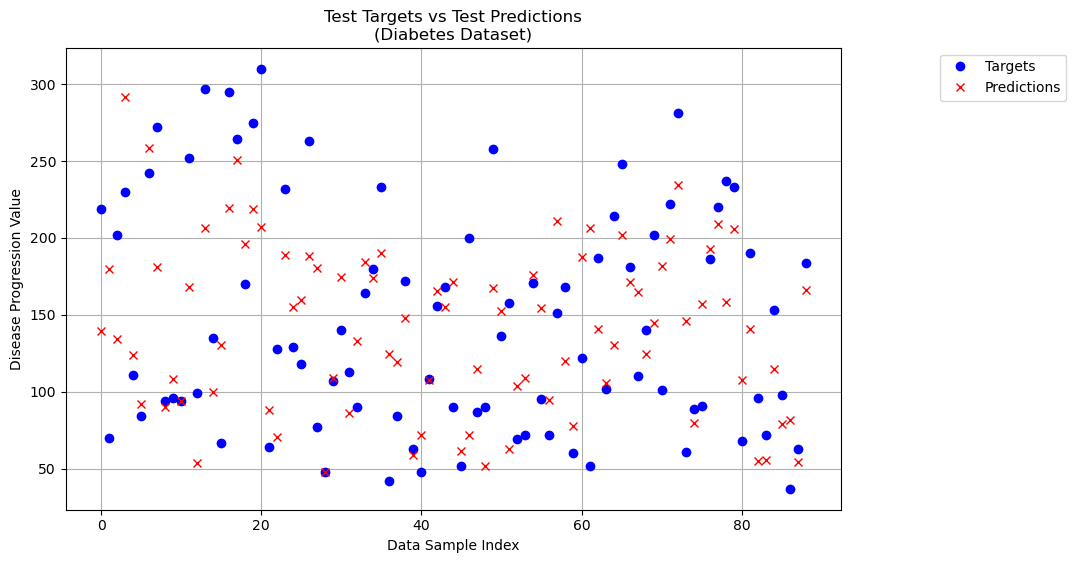

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_tst, 'ob', label='Targets', alpha=0.6)  
plt.plot(y_tst_hat, 'xr', label='Predictions', alpha=0.6)  
plt.xlabel("Data Sample Index")
plt.ylabel("House Price")
plt.title("Test Targets vs Test Predictions\n(House Listings Dataset)")
plt.legend(bbox_to_anchor=(1.3, 1.00))
plt.grid(True)
plt.show()

Due to the low number of features, it is possible to observer the learned weight values (as seen below). However, since each feature is operating on a different scale, it is hard to draw any meaningful conclusions from these values. Only when all features are operating on the same scale can you begin to associate some sort of meaning to the value of the weights.

In [ ]:
feature_names = ['bias'] + list(house_data.columns[:-1])
pd.Series(ols.w, index=feature_names)

bias   -341.378236
age       0.137688
sex     -23.064468
bmi       5.846363
bp        1.197093
s1       -1.281685
s2        0.811152
s3        0.601653
s4       10.159539
s5       67.108962
s6        0.201599
dtype: float64

#### TODO 10 (5 points): Evaluation
Compute the test $\text{SSE}$, $\text{MSE}$, and $\text{RMSE}$ to complete this TODO.

1. Compute test $\text{SSE}$ using the `sse()` function with the test predictions and test targets. Store the output into `test_sse`.
<br><br>
2. Compute test $\text{MSE}$ using the `mse()` function with the test predictions and test targets. Store the output into `test_mse`.
<br><br>
3. Compute test $\text{RMSE}$ using the `rmse()` function with the test predictions and test targets. Store the output into `test_rmse`.

In [ ]:
# TODO 10.1
tst_sse = sse(y_tst, y_tst_hat)

# TODO 10.2
tst_mse = mse(y_tst, y_tst_hat)

# TODO 10.3
tst_rmse = rmse(y_tst, y_tst_hat)

print(f"Test SSE: {tst_sse}")
print(f"Test MSE: {tst_mse}")
print(f"Test RMSE (error in dollars): ${tst_rmse:,.2f}")

Test SSE: 258117.23293592094
Test MSE: 2900.1936284934936
Test RMSE (error in original units): 53.85344583676604


In [ ]:
todo_check([
    ("tst_sse > 0", "tst_sse should be positive."),
    ("tst_mse > 0", "tst_mse should be positive."),
    ("tst_rmse > 0", "tst_rmse should be positive."),
])

Your code PASSED all the code checks! 
